# World Happiness Index

## preparing dataset

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df2015 = pd.read_csv('2015.csv')
df2016 = pd.read_csv('2016.csv')
df2017 = pd.read_csv('2017.csv')
df2018 = pd.read_csv('2018.csv')
df2019 = pd.read_csv('2019.csv')

df2015.drop(['Standard Error', 'Dystopia Residual'],axis=1,inplace=True)
df2015.rename(columns = {'Economy (GDP per Capita)':'GDP per capita', 'Family':'Social Support', 'Health (Life Expectancy)':'Healthy life expectancy', 'Trust (Government Corruption)':'Perceptions of corruption'}, inplace = True)
#get all regions and proper column order for later on
country_region = df2015[['Country', 'Region']].copy()
cols = df2015.columns.tolist()

df2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'],axis=1,inplace=True)
df2016.rename(columns = {'Economy (GDP per Capita)':'GDP per capita', 'Family':'Social Support', 'Health (Life Expectancy)':'Healthy life expectancy', 'Trust (Government Corruption)':'Perceptions of corruption' }, inplace = True)

df2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'],axis=1,inplace=True)
df2017.rename(columns = {'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score', 'Economy..GDP.per.Capita.':'GDP per capita', 'Family': 'Social Support', 'Health..Life.Expectancy.': 'Healthy life expectancy', 'Trust..Government.Corruption.': 'Perceptions of corruption'},inplace=True)
df2017 = df2017.merge(country_region, on='Country') #add the missing region for year 2019
df2017 = df2017[cols] #sort columns

df2018.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Social support':'Social Support', 'Freedom to make life choices':'Freedom', 'Score':'Happiness Score'},inplace=True)
df2018 = df2018.merge(country_region, on='Country') #add the missing region for year 2019
df2018 = df2018[cols] #sort columns

df2019.rename(columns = {'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Social support':'Social Support', 'Freedom to make life choices':'Freedom', 'Score':'Happiness Score'},inplace=True)
df2019 = df2019.merge(country_region, on='Country') #add the missing region for year 2019
df2019 = df2019[cols] #sort columns

now all into one df

In [3]:
df2015["year"] = str(2015)
df2016["year"] = str(2016)
df2017["year"] = str(2017)
df2018["year"] = str(2018)
df2019["year"] = str(2019)
df_all = df2015.append([df2016,df2017,df2018,df2019])

# First lets look at 2015 dataset

Considered in dataset contributing to happiness, values are in relation to Dystopia, the most unhappiest place on earth
- GDP per Capita
- Family
- Life Expectancy
- Freedom
- Generosity
- Trust Government Corruption


### Correlation: influence of seperate factors regarding Happiness Rank
We are using a heatmap to show the correlation. We can see that Happiness is highly dependent on GDP as well as Social Support through family and Healthy life expectancy

In [4]:
corr = df2015.corr()
corr

,Happiness Rank,Happiness Score,GDP per capita,Social Support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
Happiness Rank,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142
Happiness Score,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
GDP per capita,-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Social Support,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Healthy life expectancy,-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Perceptions of corruption,-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


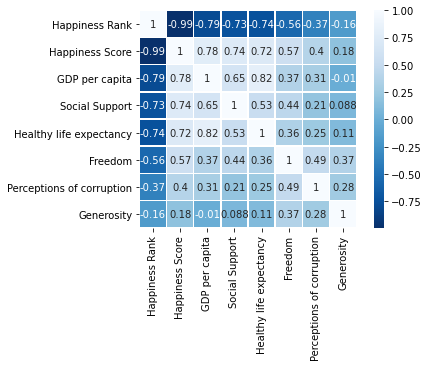

In [5]:
sns.heatmap(corr, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');

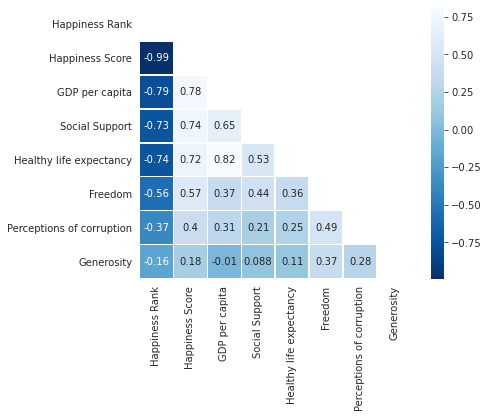

In [6]:
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(7, 5))

    ax = sns.heatmap(corr, mask = mask, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')

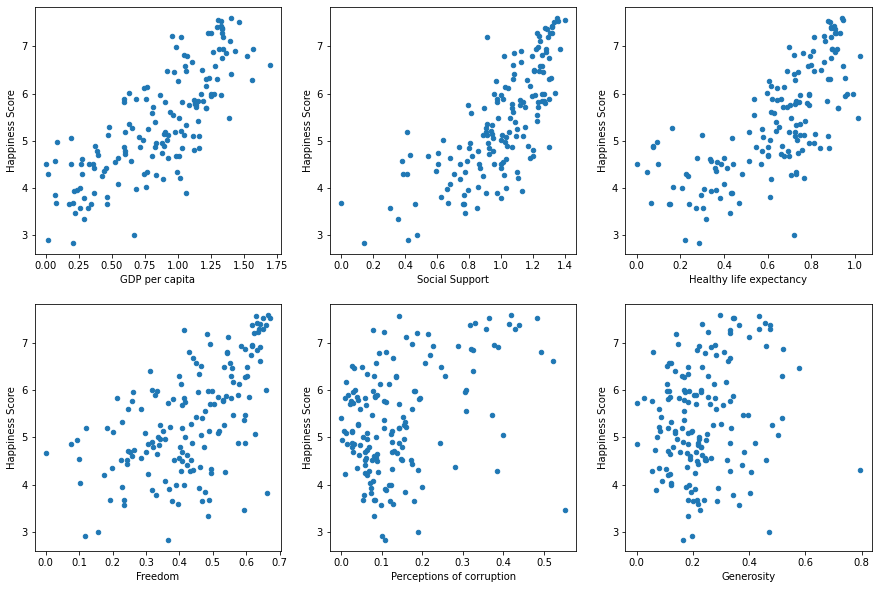

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10));

df2015.plot.scatter(ax=axes[0,0], x = 'GDP per capita', y = 'Happiness Score');
df2015.plot.scatter(ax=axes[0,1], x = 'Social Support', y = 'Happiness Score');
df2015.plot.scatter(ax=axes[0,2], x = 'Healthy life expectancy', y = 'Happiness Score');
df2015.plot.scatter(ax=axes[1,0], x = 'Freedom', y = 'Happiness Score');
df2015.plot.scatter(ax=axes[1,1], x = 'Perceptions of corruption', y = 'Happiness Score');
df2015.plot.scatter(ax=axes[1,2], x = 'Generosity', y = 'Happiness Score');


This also shows, how gdp and social support attribute the most to the happiness factor while generosity and preception of corruption show least correlation to felt happiness.
Let's use Scatterplot series to look at correlation in the year 2015

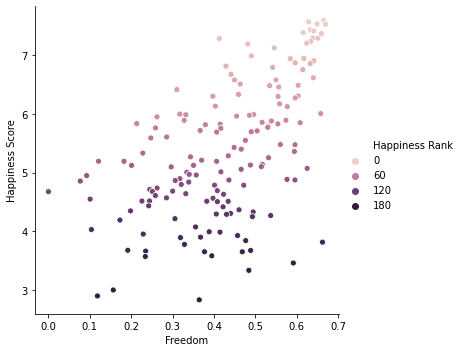

In [8]:
sns.relplot(x="Freedom", y="Happiness Score", hue="Happiness Rank", data=df2015);

Let's show all attributes development from year 2015 to 2019

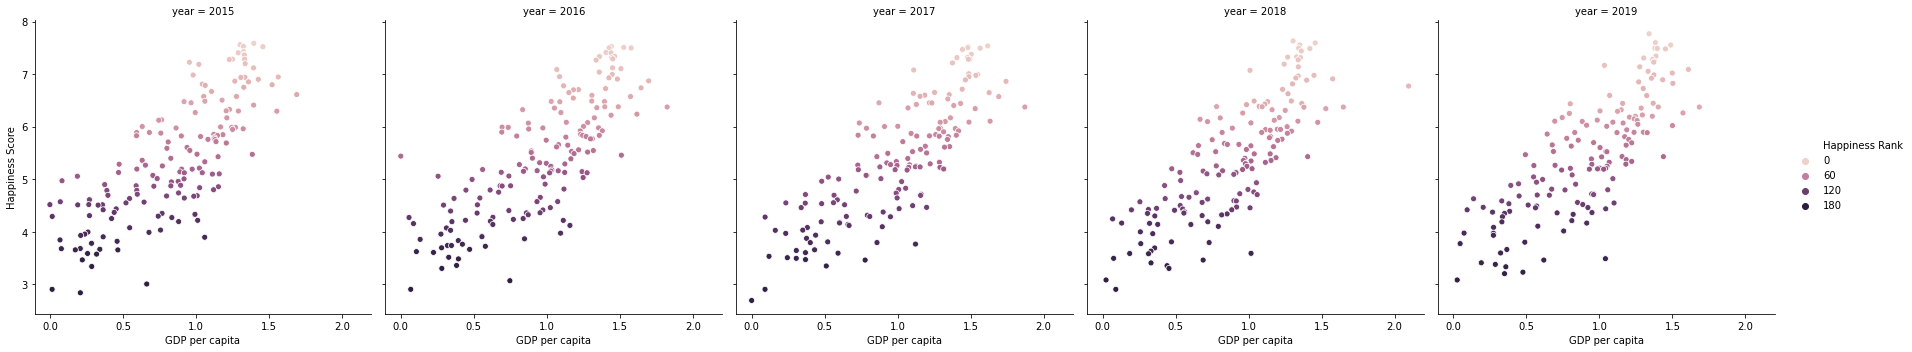

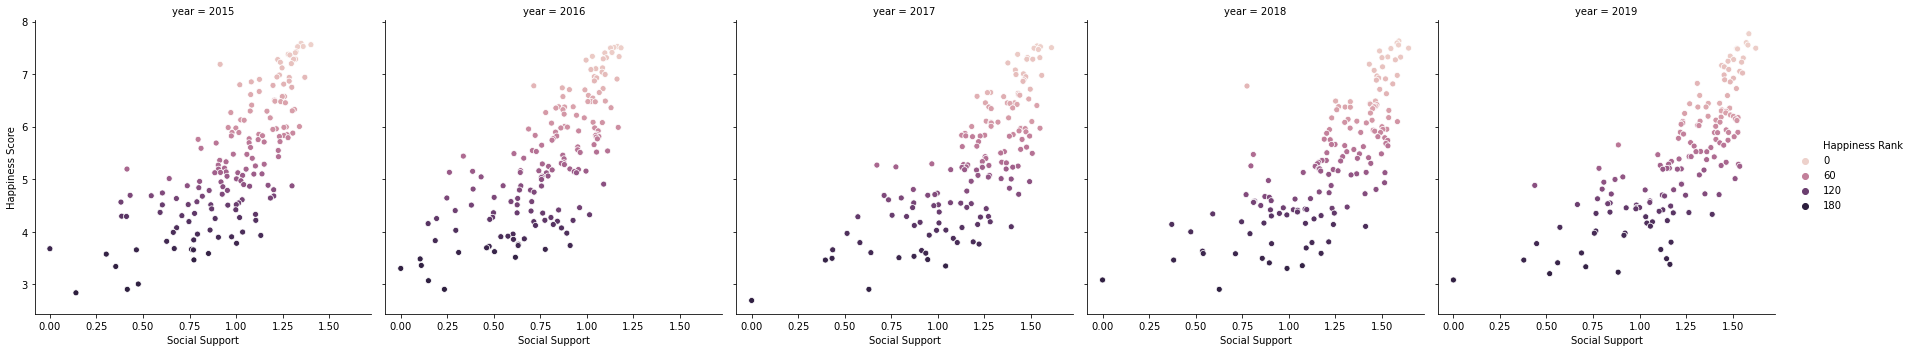

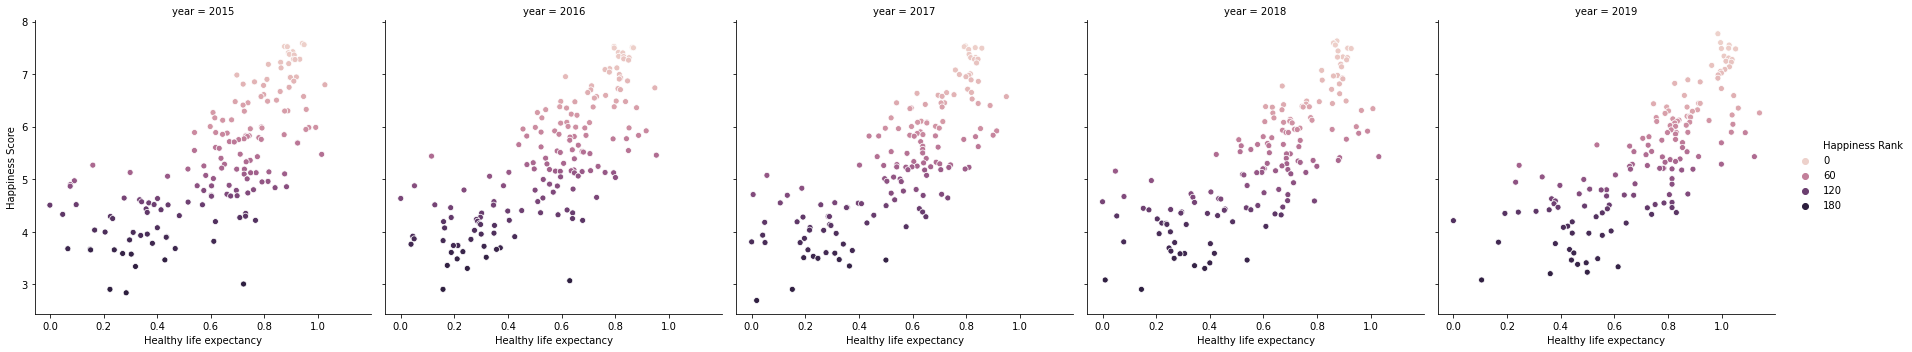

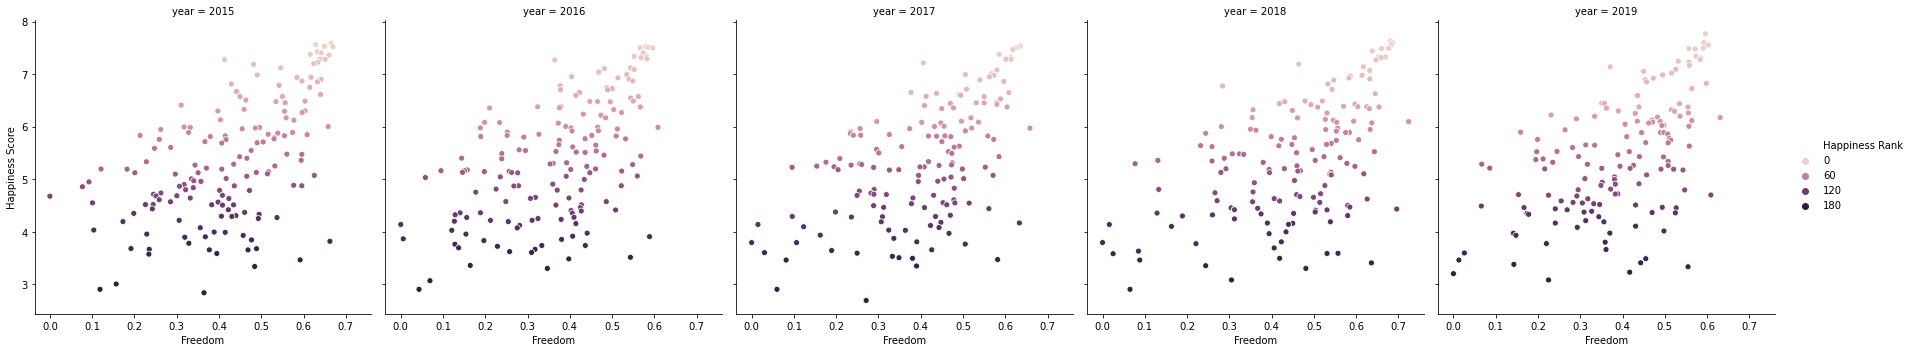

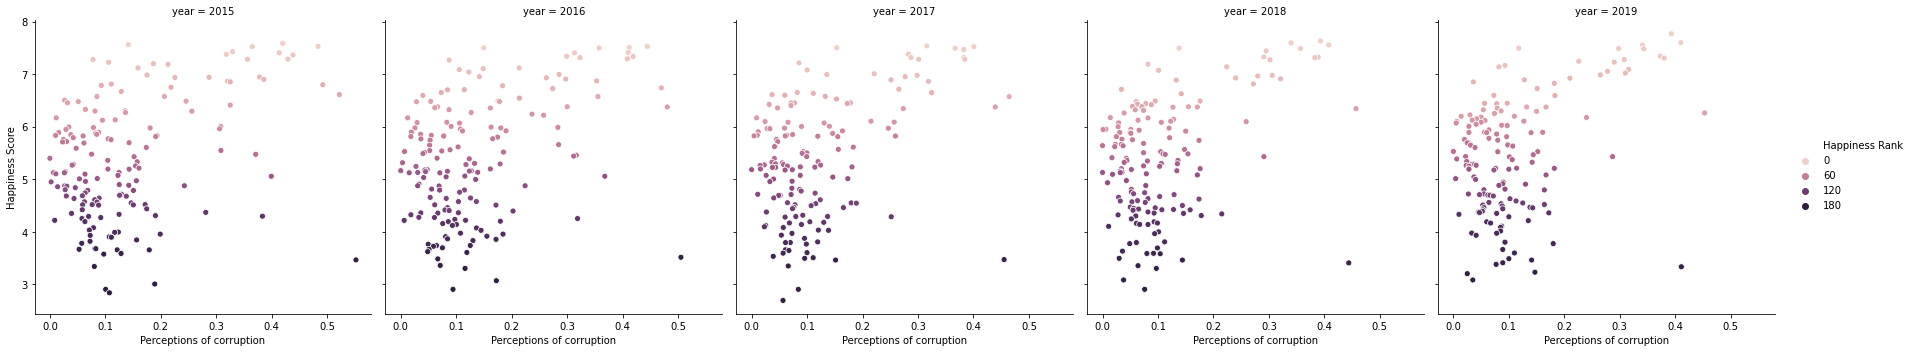

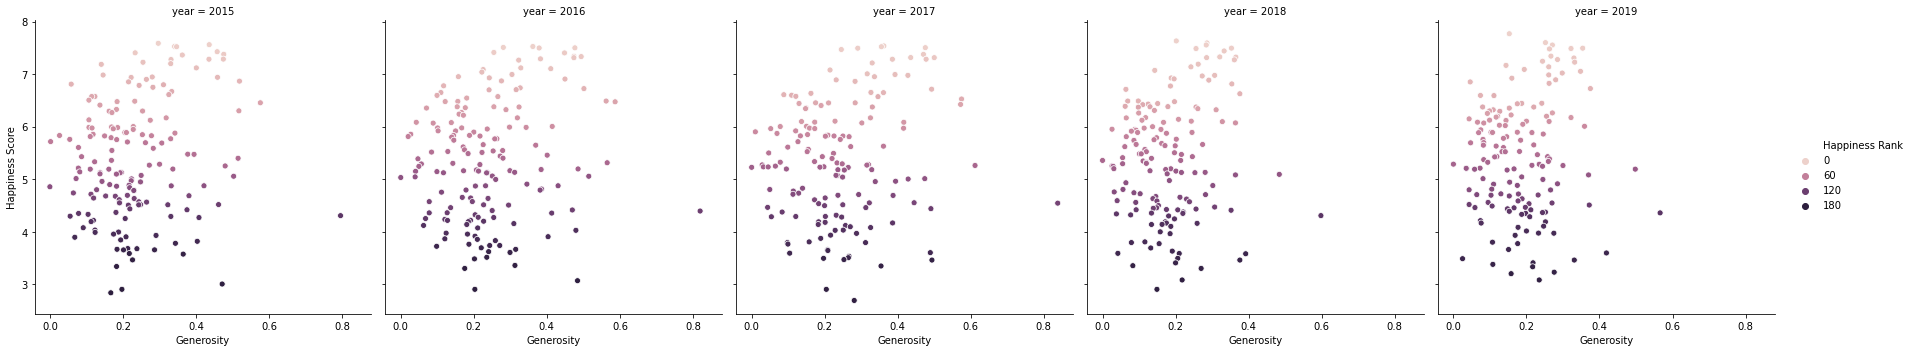

In [9]:
sns.relplot(data=df_all, x="GDP per capita", y="Happiness Score", hue="Happiness Rank", col="year");
sns.relplot(data=df_all, x="Social Support", y="Happiness Score", hue="Happiness Rank", col="year");
sns.relplot(data=df_all, x="Healthy life expectancy", y="Happiness Score", hue="Happiness Rank", col="year");
sns.relplot(data=df_all, x="Freedom", y="Happiness Score", hue="Happiness Rank", col="year");
sns.relplot(data=df_all, x="Perceptions of corruption", y="Happiness Score", hue="Happiness Rank", col="year");
sns.relplot(data=df_all, x="Generosity", y="Happiness Score", hue="Happiness Rank", col="year");

## Mean values of top10 countries, bottom10 countries and regions

In [10]:
location_mean_byregion = df2015.groupby("Region").mean()
print(location_mean_byregion)

                                 Happiness Rank  Happiness Score  \
Region                                                             
Australia and New Zealand              9.500000         7.285000   
Central and Eastern Europe            79.000000         5.332931   
Eastern Asia                          64.500000         5.626167   
Latin America and Caribbean           46.909091         6.144682   
Middle East and Northern Africa       77.600000         5.406900   
North America                         10.000000         7.273000   
Southeastern Asia                     81.222222         5.317444   
Southern Asia                        113.142857         4.580857   
Sub-Saharan Africa                   127.900000         4.202800   
Western Europe                        29.523810         6.689619   

                                 GDP per capita  Social Support  \
Region                                                            
Australia and New Zealand              1.291880  

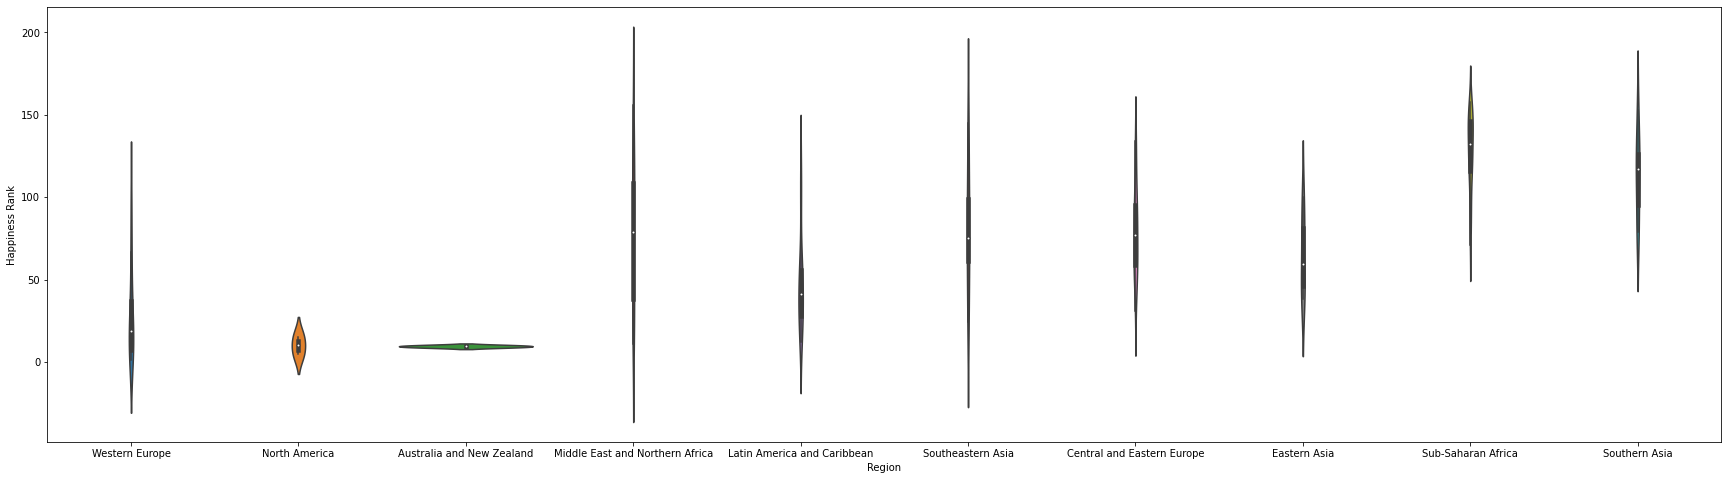

In [11]:
fig = plt.gcf()
fig.set_size_inches(30, 8)

sns.violinplot(x="Region", y="Happiness Rank", data=df2015)

plt.show()

Australia and New Zealand obviously is only 2 countries, but we can see that Western Europe is mainly happy, in the middle east the band is pretty wide and in Sub Saharan Africa aswell as Southern Asia Happiness is mainly in the bottom part of the rank.

### Top 10 Countries from 2015 next to each other regarding different attributes using stacked bar charts

In [12]:
df2015_top10 = df2015.head(10)
df2015_top10.drop(['Happiness Rank'],axis=1,inplace=True)

/home/tinu/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df2015_top10

,Country,Region,Happiness Score,GDP per capita,Social Support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


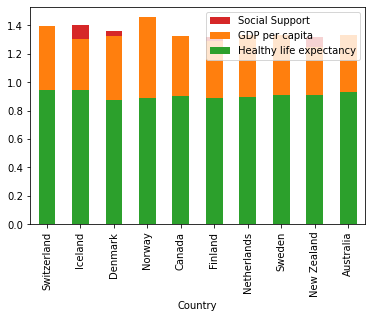

In [14]:
ax = df2015_top10.plot(y="Social Support", x="Country", kind="bar",color='C3')
df2015_top10.plot(y="GDP per capita", x="Country", kind="bar", ax=ax, color="C1")
df2015_top10.plot(y="Healthy life expectancy", x="Country", kind="bar", ax=ax, color="C2")

plt.show()

### Top10 next to Bottom10 countries for each seperate attribute in 2015

In [15]:
gdp_top10 = df2015.sort_values('GDP per capita', ascending = False).head(10)
gdp_bottom10 = df2015.sort_values('GDP per capita', ascending = True).head(10)

social_top10 = df2015.sort_values('Social Support', ascending = False).head(10)
social_bottom10 = df2015.sort_values('Social Support', ascending = True).head(10)

life_top10 = df2015.sort_values('Healthy life expectancy', ascending = False).head(10)
life_bottom10 = df2015.sort_values('Healthy life expectancy', ascending = True).head(10)

freedom_top10 = df2015.sort_values('Freedom', ascending = False).head(10)
freedom_bottom10 = df2015.sort_values('Freedom', ascending = True).head(10)

corruption_top10 = df2015.sort_values('Perceptions of corruption', ascending = False).head(10)
corruption_bottom10 = df2015.sort_values('Perceptions of corruption', ascending = True).head(10)

generosity_top10 = df2015.sort_values('Generosity', ascending = False).head(10)
generosity_bottom10 = df2015.sort_values('Generosity', ascending = True).head(10)

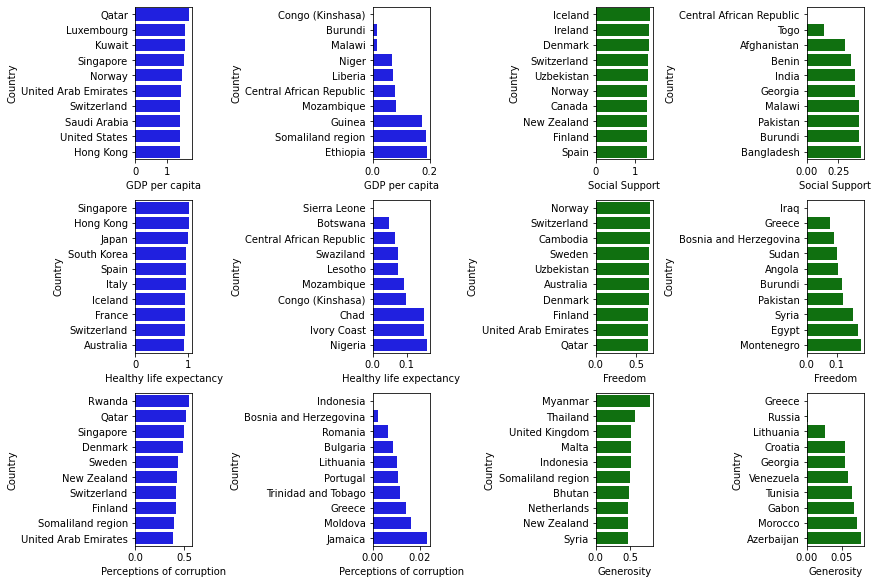

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=4, constrained_layout=True, figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country',data=gdp_top10, ax=axes[0,0], color='b')
sns.barplot(x='GDP per capita' ,y='Country',data=gdp_bottom10, ax=axes[0,1], color='b')

sns.barplot(x='Social Support',y='Country',data=social_top10, ax=axes[0,2], color='g')
sns.barplot(x='Social Support' ,y='Country',data=social_bottom10, ax=axes[0,3], color='g')

sns.barplot(x='Healthy life expectancy',y='Country',data=life_top10, ax=axes[1,0], color='b')
sns.barplot(x='Healthy life expectancy' ,y='Country',data=life_bottom10, ax=axes[1,1], color='b')

sns.barplot(x='Freedom',y='Country',data=freedom_top10, ax=axes[1,2], color='g')
sns.barplot(x='Freedom' ,y='Country',data=freedom_bottom10, ax=axes[1,3], color='g')

sns.barplot(x='Perceptions of corruption',y='Country',data=corruption_top10, ax=axes[2,0], color='b')
sns.barplot(x='Perceptions of corruption' ,y='Country',data=corruption_bottom10, ax=axes[2,1], color='b')

sns.barplot(x='Generosity',y='Country',data=generosity_top10, ax=axes[2,2], color='g')
sns.barplot(x='Generosity' ,y='Country',data=generosity_bottom10, ax=axes[2,3], color='g')

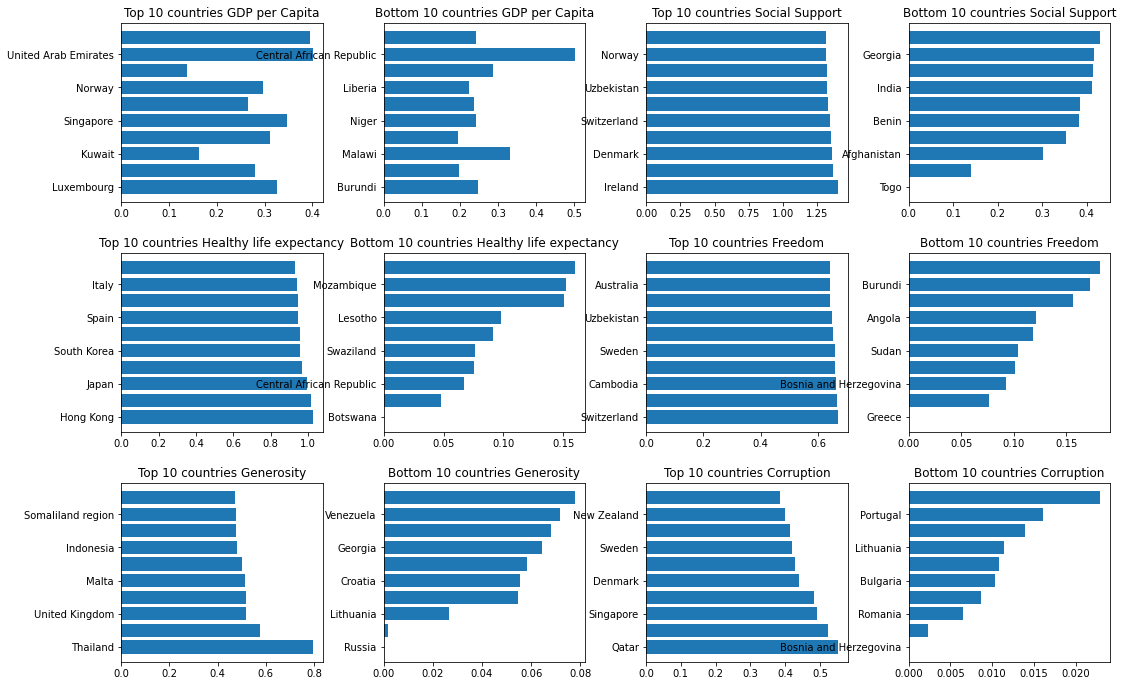

In [17]:
x = range(10) #list elements 0 to 9

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15,10));
fig.tight_layout(pad=3)

ax[0][0].barh(x, gdp_top10.Generosity)
ax[0][0].set_title('Top 10 countries GDP per Capita')
ax[0][0].set_yticklabels(gdp_top10.Country)
ax[0][1].barh(x, gdp_bottom10.Generosity)
ax[0][1].set_title('Bottom 10 countries GDP per Capita')
ax[0][1].set_yticklabels(gdp_bottom10.Country)

ax[0][2].barh(x, social_top10['Social Support'])
ax[0][2].set_title('Top 10 countries Social Support')
ax[0][2].set_yticklabels(social_top10.Country)
ax[0][3].barh(x, social_bottom10['Social Support'])
ax[0][3].set_title('Bottom 10 countries Social Support')
ax[0][3].set_yticklabels(social_bottom10.Country)

ax[1][0].barh(x, life_top10['Healthy life expectancy'])
ax[1][0].set_title('Top 10 countries Healthy life expectancy')
ax[1][0].set_yticklabels(life_top10.Country)
ax[1][1].barh(x, life_bottom10['Healthy life expectancy'])
ax[1][1].set_title('Bottom 10 countries Healthy life expectancy')
ax[1][1].set_yticklabels(life_bottom10.Country)

ax[1][2].barh(x, freedom_top10['Freedom'])
ax[1][2].set_title('Top 10 countries Freedom')
ax[1][2].set_yticklabels(freedom_top10.Country)
ax[1][3].barh(x, freedom_bottom10['Freedom'])
ax[1][3].set_title('Bottom 10 countries Freedom')
ax[1][3].set_yticklabels(freedom_bottom10.Country)

ax[2][0].barh(x, generosity_top10['Generosity'])
ax[2][0].set_title('Top 10 countries Generosity')
ax[2][0].set_yticklabels(generosity_top10.Country)
ax[2][1].barh(x, generosity_bottom10['Generosity'])
ax[2][1].set_title('Bottom 10 countries Generosity')
ax[2][1].set_yticklabels(generosity_bottom10.Country)

ax[2][2].barh(x, corruption_top10['Perceptions of corruption'])
ax[2][2].set_title('Top 10 countries Corruption')
ax[2][2].set_yticklabels(corruption_top10.Country)
ax[2][3].barh(x, corruption_bottom10['Perceptions of corruption'])
ax[2][3].set_title('Bottom 10 countries Corruption')
ax[2][3].set_yticklabels(corruption_bottom10.Country)

plt.show();

### Development of top10 countries from 2015 over time from 2015 - 2019 regarding rank and factors

In [ ]:
#line chart time series small multiples

## Maps
### global

In [27]:
import plotly.express as px

fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness Rank",
                    hover_name="Country",
                    animation_frame="year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Regional exploration

In [19]:
set(df_all.Region)

{'Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Western Europe'}

In [20]:
df_all_oceania = df_all[df_all.Region == 'Australia and New Zealand']
df_all_EuropeCentralEast = df_all[df_all.Region == 'Central and Eastern Europe']
df_all_EuropeWestern = df_all[df_all.Region == 'Australia and New Zealand']
df_all_AmericaSouth = df_all[df_all.Region == 'Latin America and Caribbean']
df_all_AmericaNorth = df_all[df_all.Region == 'North America']
df_all_AfricaMiddleEastNorth = df_all[df_all.Region == 'Middle East and Northern Africa']
df_all_AfricaSubSahara = df_all[df_all.Region == 'Sub-Saharan Africa']
df_all_AsiaEast = df_all[df_all.Region == 'Eastern Asia']
df_all_AsiaSouthEast = df_all[df_all.Region == 'Southeastern Asia']
df_all_AsiaSouth = df_all[df_all.Region == 'Southern Asia']

In [21]:
df_all_oceania['Freedom'].mean()

0.6114129512748718

Happiness ratio per region in year 2015

In [39]:
region_lists=list(df2015['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=df2015[df2015['Region']==each]
    region_happiness_rate=sum(region['Happiness Score']/len(region))
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'region happiness ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


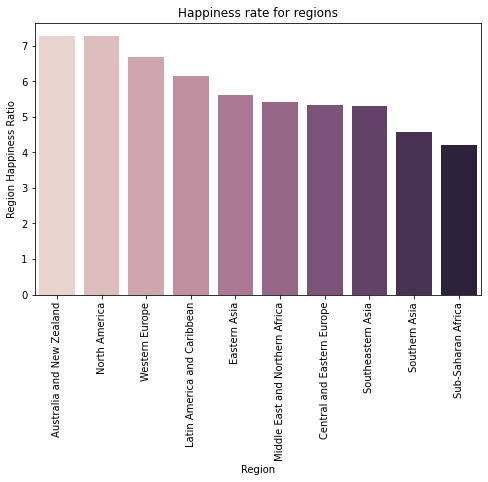

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

### Map visualization development of happiness rank from 2015-2019 per country

In [28]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="north america",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [29]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="europe",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [30]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="asia",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [31]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="africa",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [32]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="south america",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Development of Switzerland from 2015-2019

In [22]:
column = df_all[df_all.Country == 'Switzerland']
column

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social Support,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,2015
1,Switzerland,Western Europe,2,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,2016
3,Switzerland,Western Europe,4,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,2017
4,Switzerland,Western Europe,5,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,2018
5,Switzerland,Western Europe,6,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,2019
